In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [41]:
california=fetch_california_housing()
california_df=pd.DataFrame(data=california.data,columns=california.feature_names)
california_df['MedHouseVal']=california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
# print shape of data
california_df.shape

(20640, 9)

In [43]:
california_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [44]:
california_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

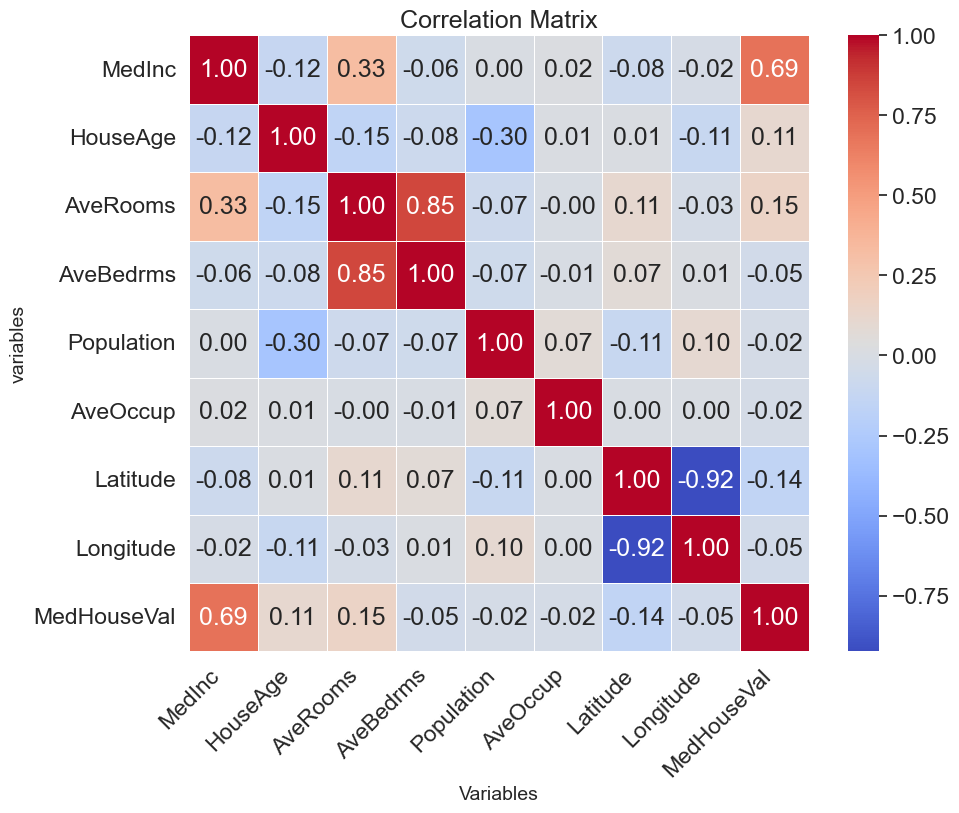

In [45]:
corr_matrix=california_df.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix',fontsize=18)
plt.xlabel('Variables',fontsize=14)
plt.ylabel('variables',fontsize=14)

#customize tick lables
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(),rotation=0,horizontalalignment='right')
plt.show()

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

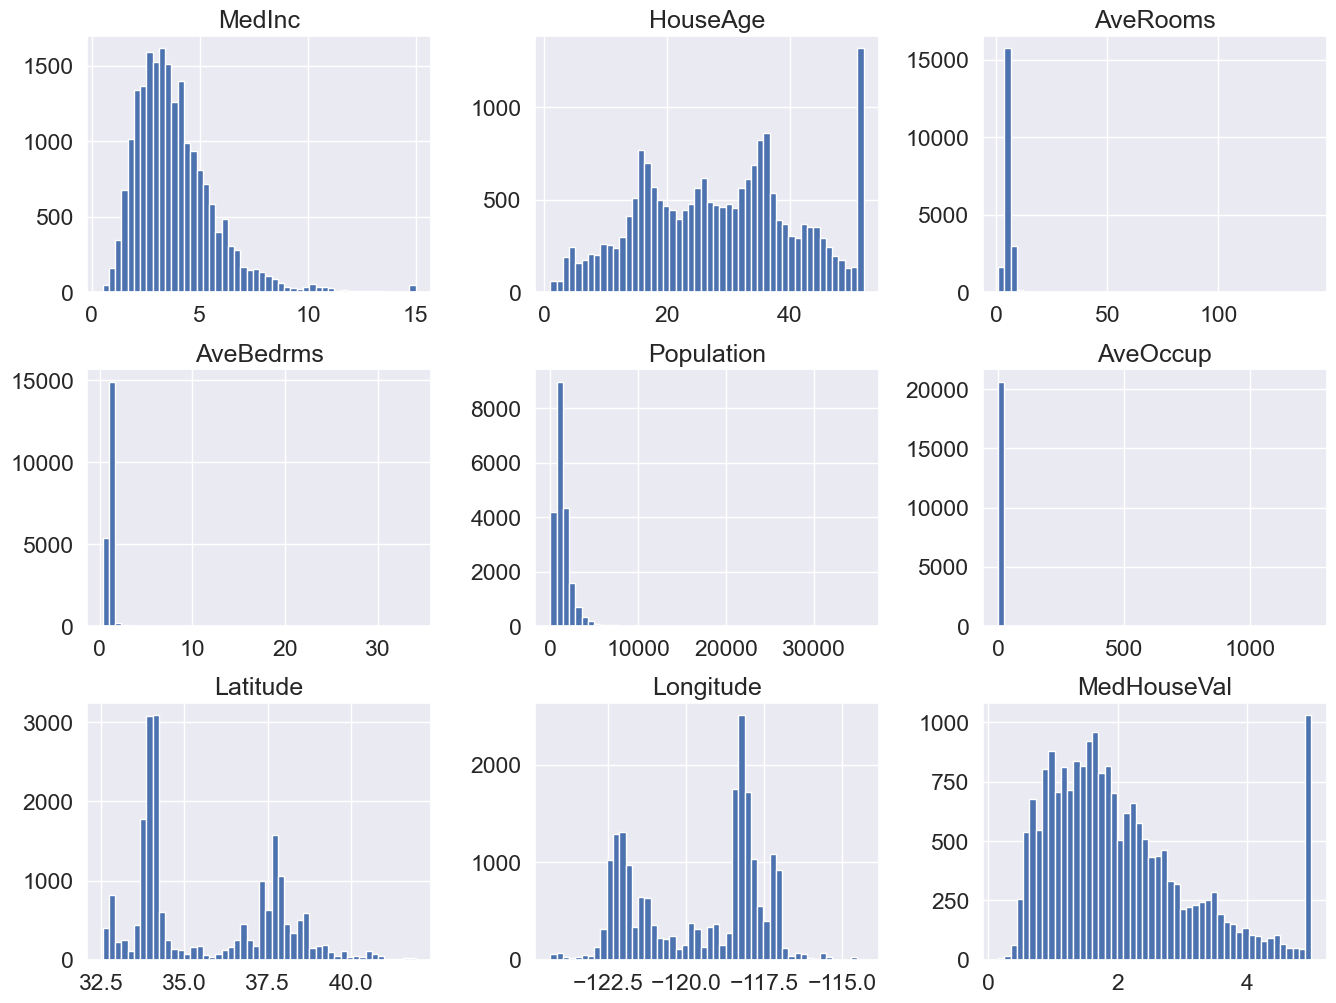

In [58]:
california_df.hist(bins=50,figsize=(16,12))

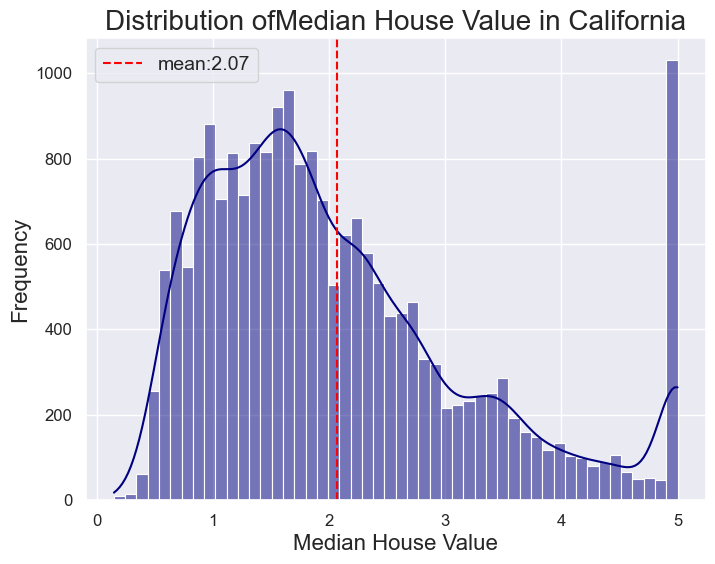

In [38]:
# histogram 
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.histplot(data=california_df,x='MedHouseVal',kde=True,bins=50,color='navy')
plt.xlabel('Median House Value',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Distribution ofMedian House Value in California',fontsize=20)

#tickmarks and lables
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#vertical line for mean
mean=california_df['MedHouseVal'].mean()
plt.axvline(mean,color='red',linestyle='--',label=f'mean:{mean:.2f}')
plt.legend(fontsize=14)
plt.show()

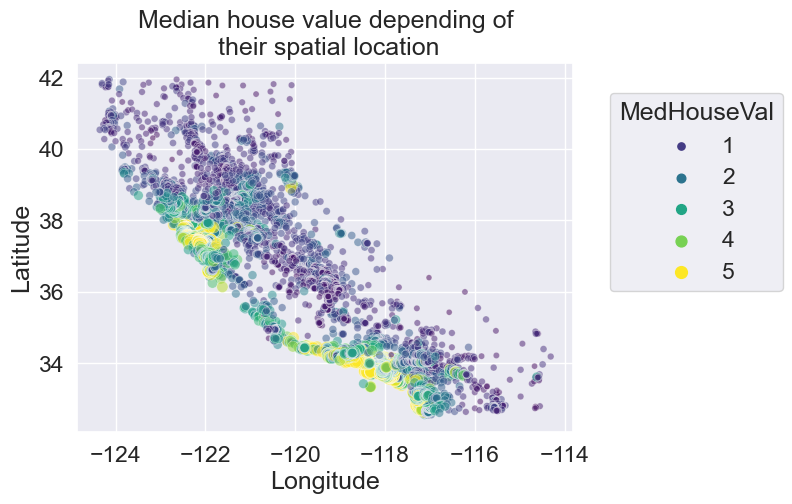

In [34]:
sns.scatterplot(data=california_df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

Text(0.5, 1.0, 'Distribution of households')

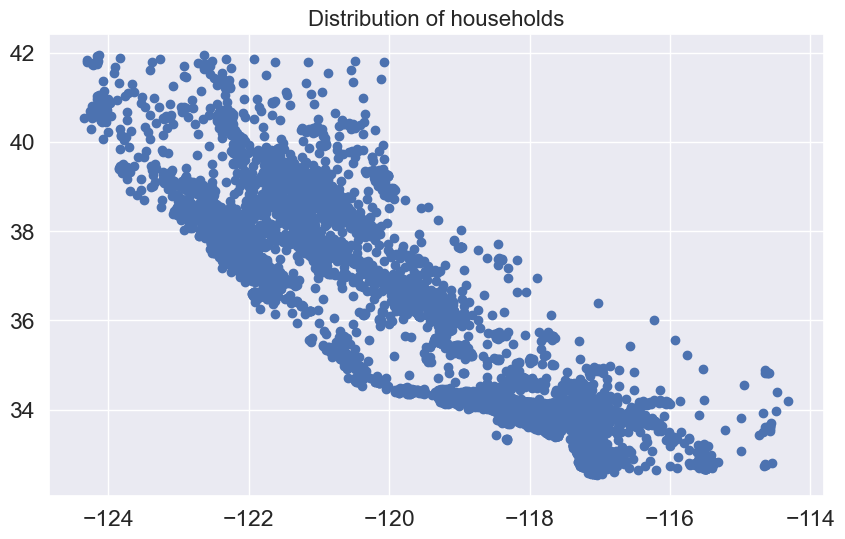

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x=california_df['Longitude'],y=california_df['Latitude'])
plt.title("Distribution of households",size=16)

Text(0.5, 1.0, 'Distribution of households')

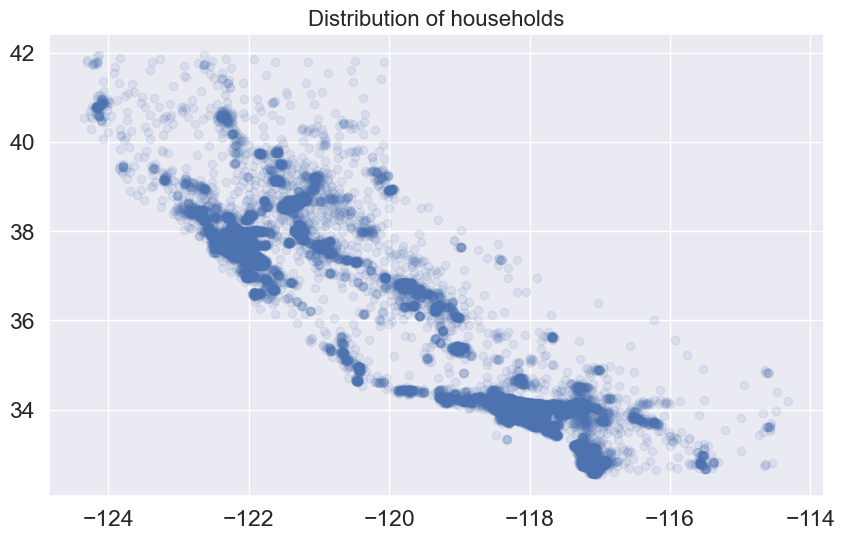

In [49]:
# for seeing high density area
plt.figure(figsize=(10,6))
plt.scatter(x=california_df['Longitude'],y=california_df['Latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

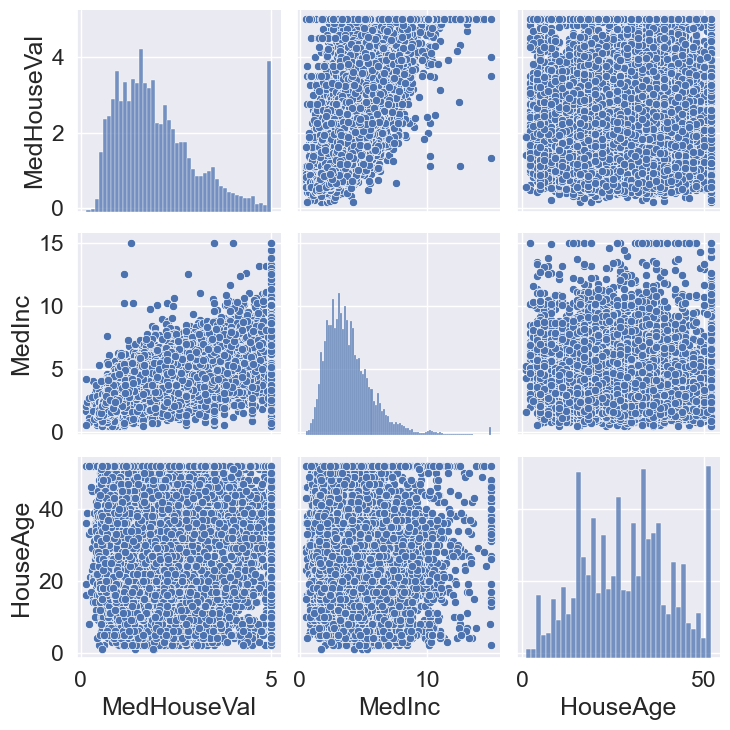

In [51]:
sns.pairplot(california_df[['MedHouseVal','MedInc','HouseAge']])

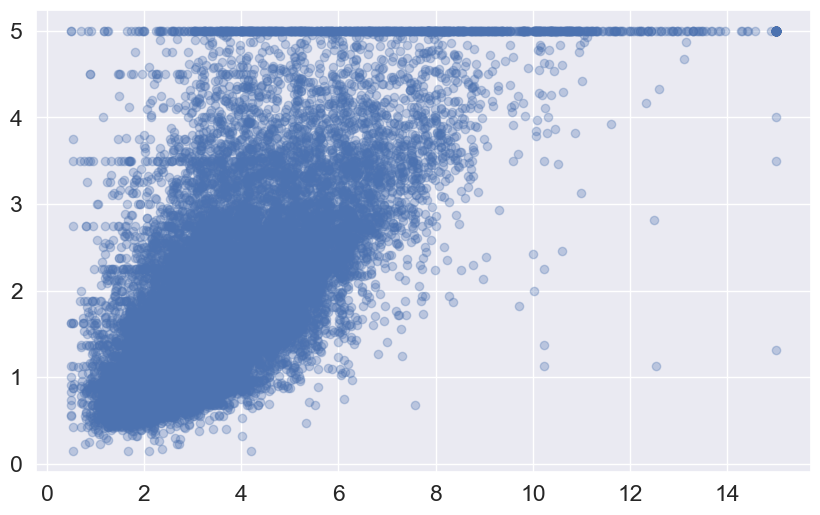

In [53]:
# median income and median house price
plt.figure(figsize=(10,6))
plt.scatter(y=california_df['MedHouseVal'],x=california_df['MedInc'],alpha=0.3)

In [54]:
# removing outliars
num_features=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal']

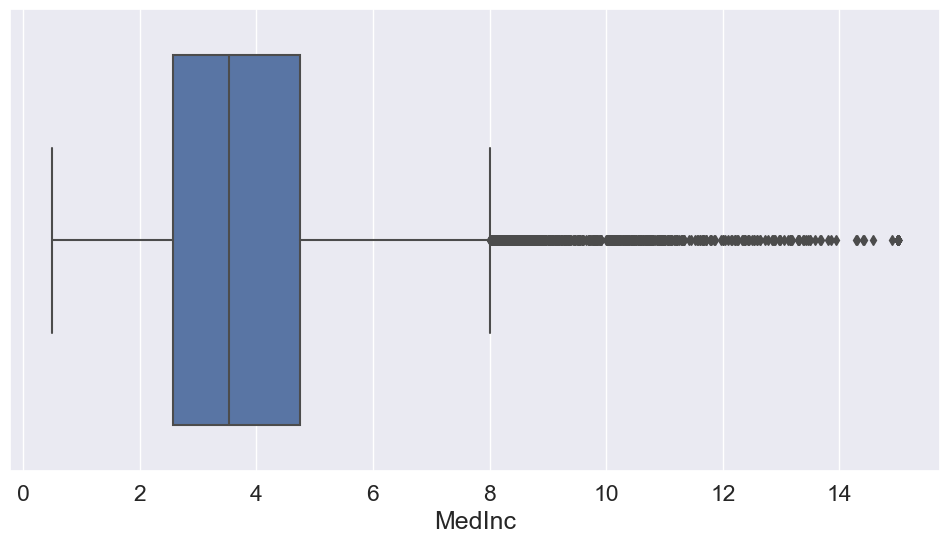

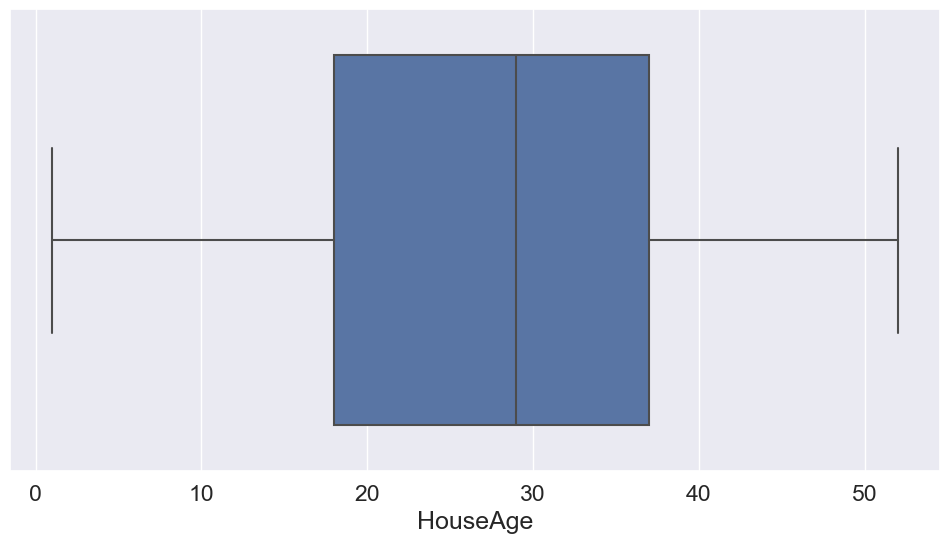

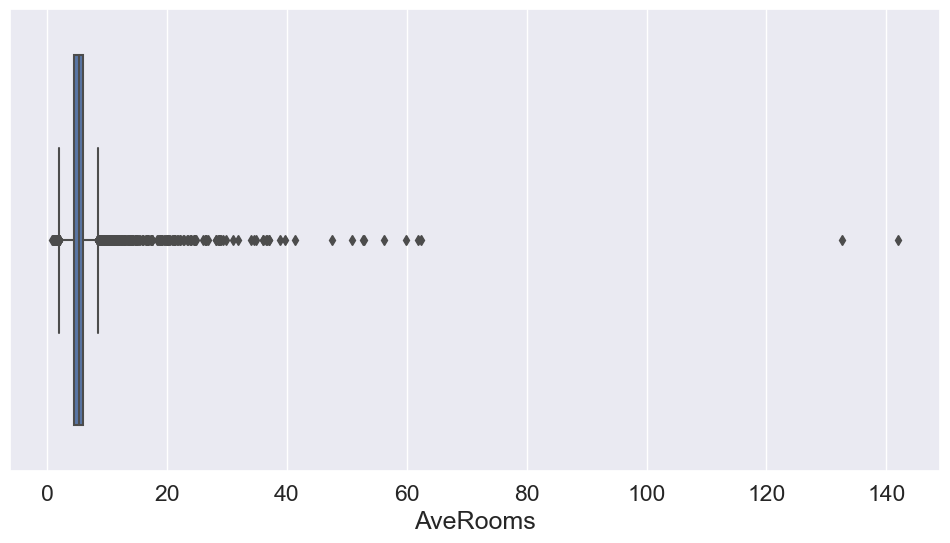

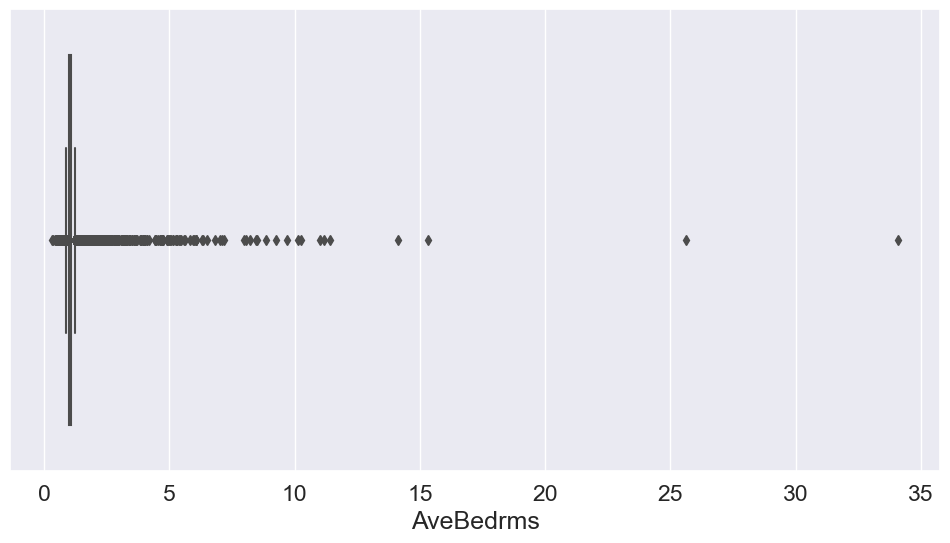

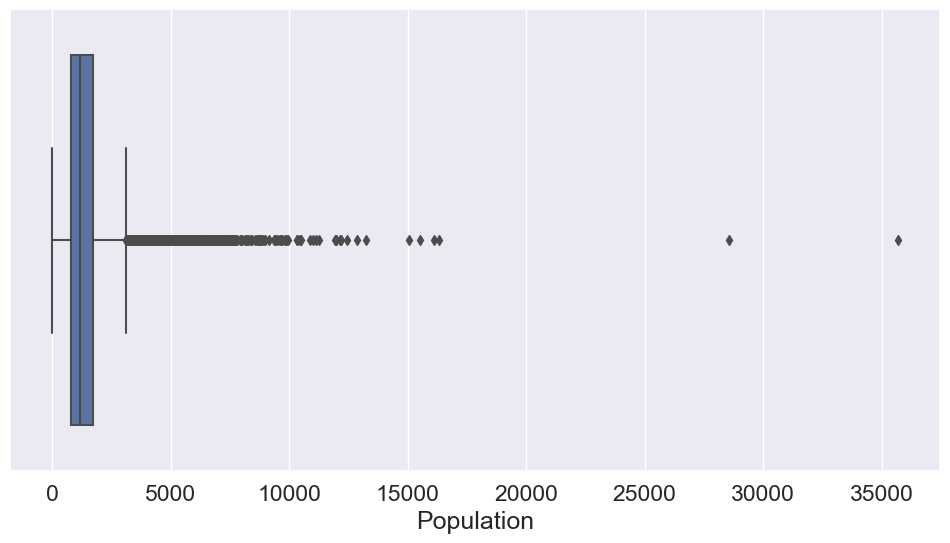

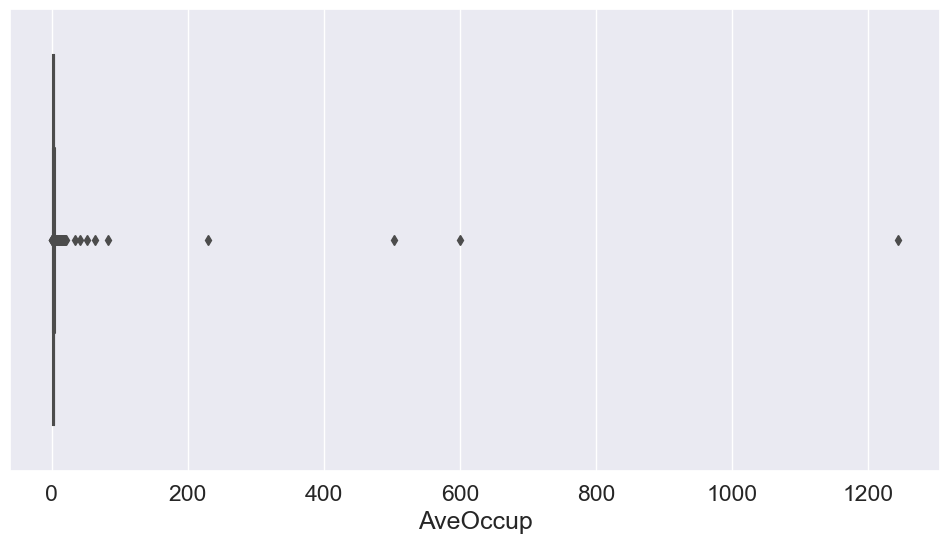

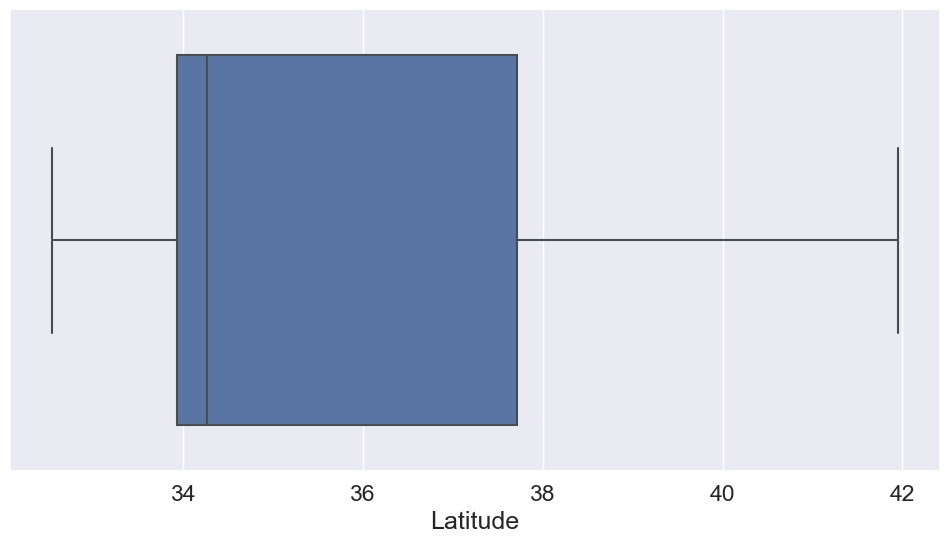

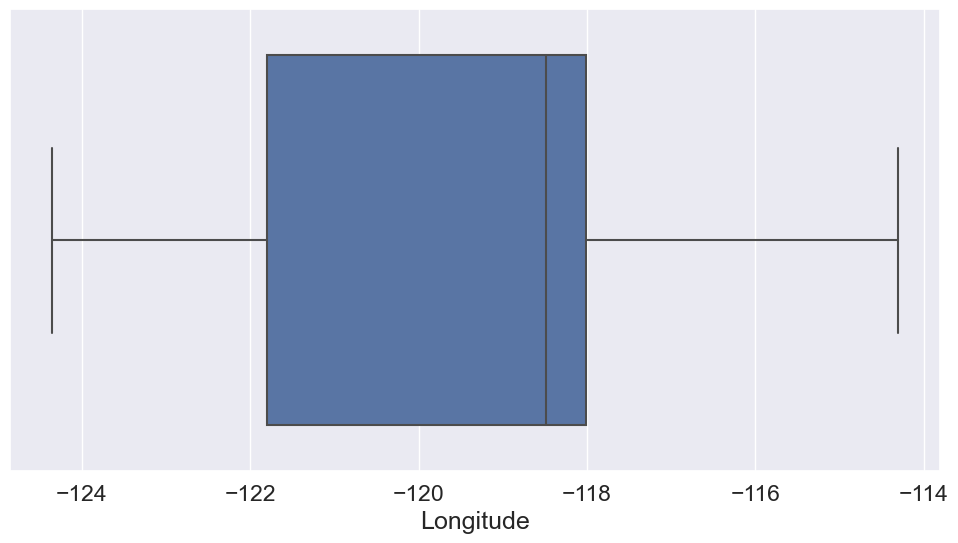

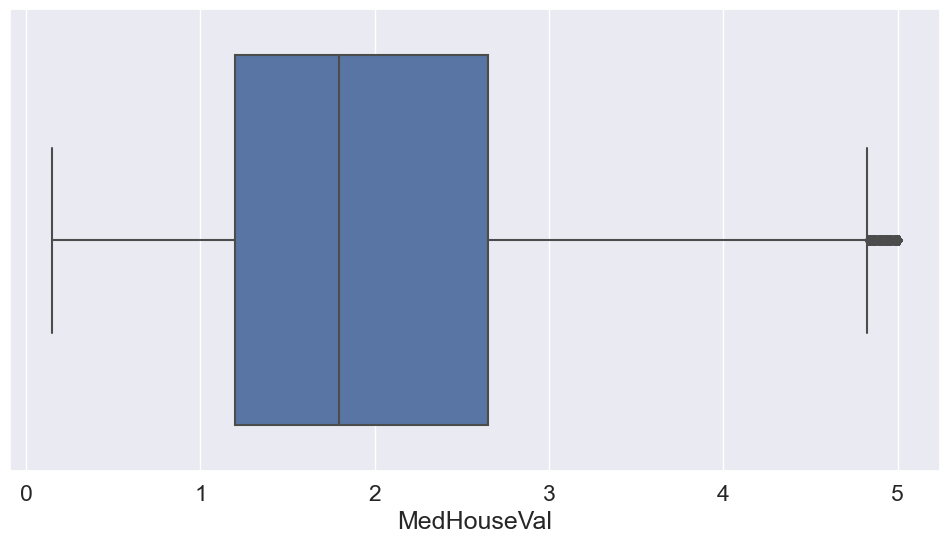

In [56]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=california_df,ax=ax)

In [59]:
#get skewness
skewness=[]
for i in num_features:
    skewness.append(california_df[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
AveOccup,97.639561
AveBedrms,31.316956
AveRooms,20.697869
Population,4.935858
MedInc,1.646657
MedHouseVal,0.977763
Latitude,0.465953
HouseAge,0.060331
Longitude,-0.297801


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data,
                                                    california.target, random_state=11)
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [63]:
linear_regressor = LinearRegression(normalize = True, fit_intercept = False, copy_X = True).fit(X_train, y_train)

print("training score : ", linear_regressor.score(X_train, y_train))

training score :  0.5486873815829729
